# Observation to Model Comparison: CTDs

This notebook extracts CDT data in the xls format and extracts model data for those locations and plots
comparisons

Note: for now we only compare the May 2024 CTD data with model data from 100 m resolution model in May 2012

In [1]:
import subprocess
import os
import pandas as pd
import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
import dask
#from ocean_c_lab_tools import *
#from celluloid import Camera 
#import PyCO2SYS as csys
import seawater as sw
from roms_regrid import *

### Extract observation data and read into xarray

In [2]:


xls = pd.ExcelFile('/global/cfs/cdirs/m4632/uheede/Hafro_obsdata/Hafro_cruises.xls')

df1 = pd.read_excel(xls, 'sf202402_odv',decimal='.')
df2 = pd.read_excel(xls, 'sf202403_odv',decimal='.')
df3 = pd.read_excel(xls, 'b202405_odv',decimal='.')
df4 = pd.read_excel(xls, 'b202406_odv',decimal='.')

obs=xr.Dataset.from_dataframe(df4)
obs=obs.set_index(index=['HV','Depth','mon/day/yr'])
obs=obs.unstack('index')
obs=obs.rename(name_dict={'mon/day/yr':'time','Depth':'depth','Latitude(¬∞N)':'lat','Longitude(¬∞E)':'lon'})


In [18]:
obs.HV

<xarray.DataArray 'HV' (HV: 10)>
array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Coordinates:
  * HV       (HV) int64 1 3 4 5 6 7 8 9 10 11

### extract locations based on HV (which is station ID)

In [38]:

loc1=[obs['lat'].isel(HV=0).isel(depth=0).squeeze().values,obs['lon'].isel(HV=0).isel(depth=0).squeeze().values+360]
loc2=[obs['lat'].isel(HV=1).isel(depth=0).squeeze().values,obs['lon'].isel(HV=1).isel(depth=0).squeeze().values+360]
loc3=[obs['lat'].isel(HV=2).isel(depth=0).squeeze().values,obs['lon'].isel(HV=2).isel(depth=0).squeeze().values+360]
loc4=[obs['lat'].isel(HV=3).isel(depth=0).squeeze().values,obs['lon'].isel(HV=3).isel(depth=0).squeeze().values+360]
loc5=[obs['lat'].isel(HV=4).isel(depth=0).squeeze().values,obs['lon'].isel(HV=4).isel(depth=0).squeeze().values+360]
loc6=[obs['lat'].isel(HV=5).isel(depth=0).squeeze().values,obs['lon'].isel(HV=5).isel(depth=0).squeeze().values+360]
loc7=[obs['lat'].isel(HV=6).isel(depth=0).squeeze().values,obs['lon'].isel(HV=6).isel(depth=0).squeeze().values+360]
loc8=[obs['lat'].isel(HV=7).isel(depth=0).squeeze().values,obs['lon'].isel(HV=7).isel(depth=0).squeeze().values+360]
loc9=[obs['lat'].isel(HV=8).isel(depth=0).squeeze().values,obs['lon'].isel(HV=8).isel(depth=0).squeeze().values+360]
loc10=[obs['lat'].isel(HV=9).isel(depth=0).squeeze().values,obs['lon'].isel(HV=9).isel(depth=0).squeeze().values+360]




### Load and regrid model-data

In [ ]:

#x=xr.open_mfdataset('/pscratch/sd/u/uheede/from_expanse/Iceland3/*', combine='nested', concat_dim=["time"])
x=xr.open_mfdataset('/pscratch/sd/u/uheede/from_expanse/Iceland3/z_Iceland3_rnd.20120516130000.nc', combine='nested', concat_dim=["time"])

grid=xr.open_mfdataset('/pscratch/sd/u/uheede/from_expanse/Iceland3/Iceland3_grd.nc')

x_mean=x.mean('time')
x_std=x.std('time')
x=xr.concat([x_mean,x_std],dim="type")
t=x['t']
s=x['s']

t=roms_regrid(grid,t)
s=roms_regrid(grid,s)
t=t.where(t != 0)
s=s.where(s != 0)
;

In [ ]:
t.load()
s.load()
;

### plot a station overview

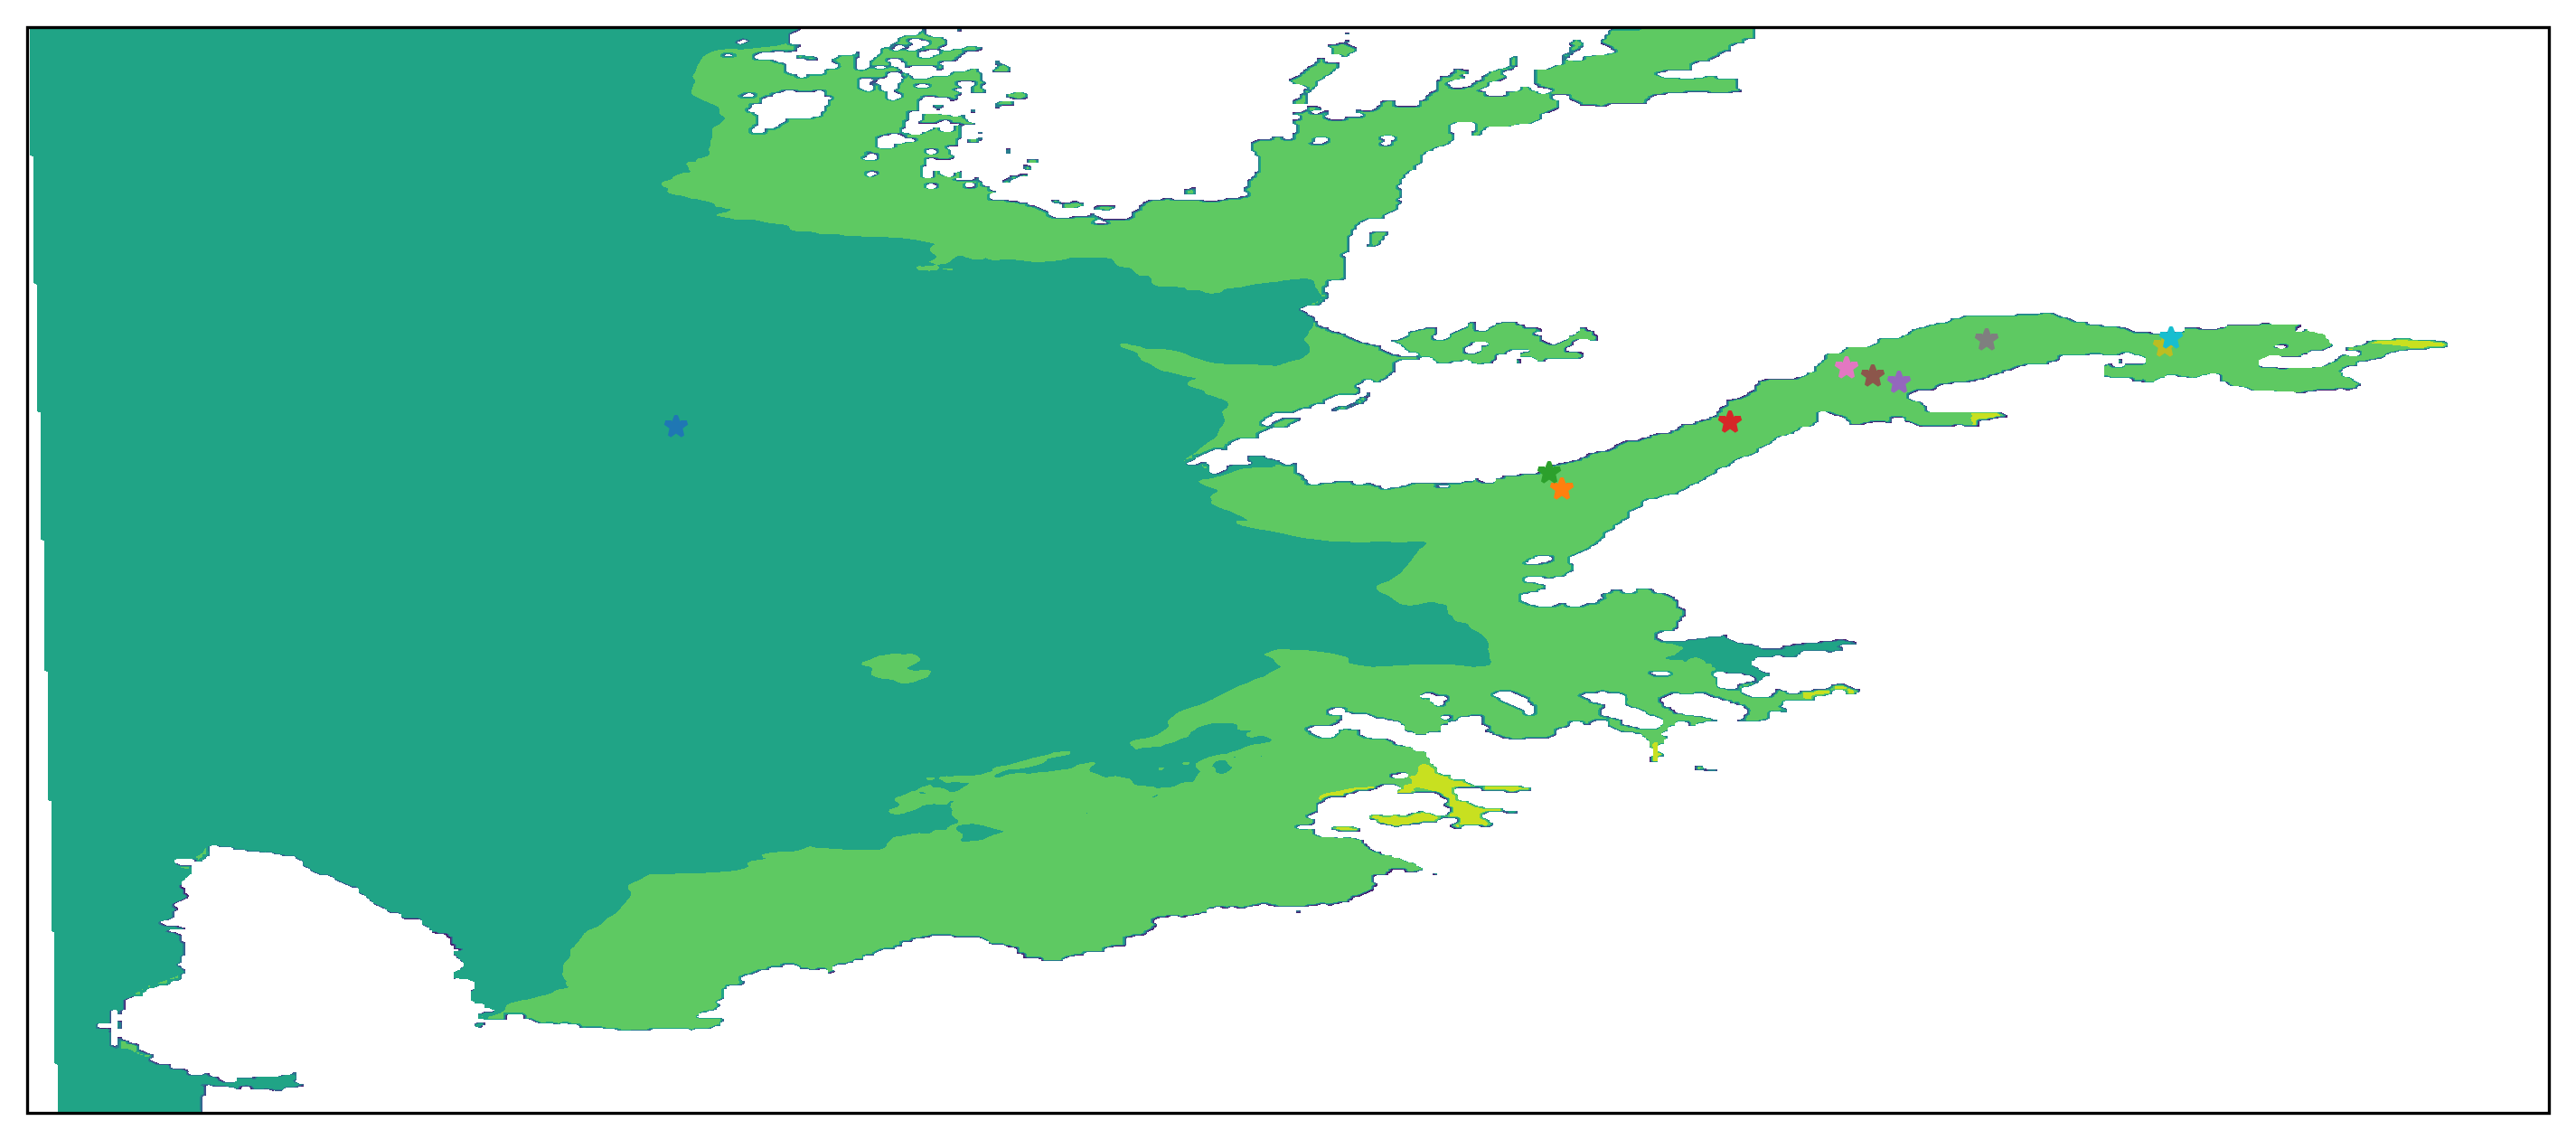

In [17]:


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=(12,12),dpi=300)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.contourf(t.lon,t.lat,t.isel(depth=0).isel(type=0),transform=ccrs.PlateCarree())
ax.plot(loc1[1],loc1[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc2[1],loc2[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc3[1],loc3[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc4[1],loc4[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc5[1],loc5[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc6[1],loc6[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc7[1],loc7[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc8[1],loc8[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc9[1],loc9[0],'*',transform=ccrs.PlateCarree())
ax.plot(loc10[1],loc10[0],'*',transform=ccrs.PlateCarree())

Why is there no station 2 and what's up with station 1? Need to ask Andreas

### Find the nearest model grid point

In [39]:
t1=t.sel(lat=loc1[0], method='nearest').sel(lon=loc1[1], method='nearest')
t2=t.sel(lat=loc2[0], method='nearest').sel(lon=loc2[1], method='nearest')
t3=t.sel(lat=loc3[0], method='nearest').sel(lon=loc3[1], method='nearest')
t4=t.sel(lat=loc4[0], method='nearest').sel(lon=loc4[1], method='nearest')
t5=t.sel(lat=loc5[0], method='nearest').sel(lon=loc5[1], method='nearest')
t6=t.sel(lat=loc6[0], method='nearest').sel(lon=loc6[1], method='nearest')
t7=t.sel(lat=loc7[0], method='nearest').sel(lon=loc7[1], method='nearest')
t8=t.sel(lat=loc8[0], method='nearest').sel(lon=loc8[1], method='nearest')
t9=t.sel(lat=loc9[0], method='nearest').sel(lon=loc9[1], method='nearest')
t10=t.sel(lat=loc10[0], method='nearest').sel(lon=loc10[1], method='nearest')

s1=s.sel(lat=loc1[0], method='nearest').sel(lon=loc1[1], method='nearest')
s2=s.sel(lat=loc2[0], method='nearest').sel(lon=loc2[1], method='nearest')
s3=s.sel(lat=loc3[0], method='nearest').sel(lon=loc3[1], method='nearest')
s4=s.sel(lat=loc4[0], method='nearest').sel(lon=loc4[1], method='nearest')
s5=s.sel(lat=loc5[0], method='nearest').sel(lon=loc5[1], method='nearest')
s6=s.sel(lat=loc6[0], method='nearest').sel(lon=loc6[1], method='nearest')
s7=s.sel(lat=loc7[0], method='nearest').sel(lon=loc7[1], method='nearest')
s8=s.sel(lat=loc8[0], method='nearest').sel(lon=loc8[1], method='nearest')
s9=s.sel(lat=loc9[0], method='nearest').sel(lon=loc9[1], method='nearest')
s10=s.sel(lat=loc10[0], method='nearest').sel(lon=loc10[1], method='nearest')


### Compare obs with model

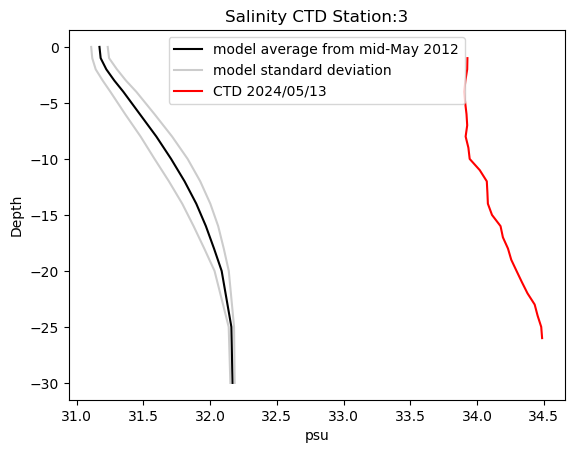

In [51]:
#plt.fill_between(s1.sel(type=0)-s1.sel(type=1),s1.sel(type=0)+s1.sel(type=1),color='gray',alpha=0.5)


plt.plot(s2.sel(type=0),s2.depth,label='model average from mid-May 2012', color='black')
plt.plot(s2.sel(type=0)+s2.sel(type=1),s2.depth,label='model standard deviation',color='grey',alpha=0.4)
plt.plot(s2.sel(type=0)-s2.sel(type=1),s2.depth,color='grey',alpha=0.4)
plt.plot(obs['Salinity'].isel(HV=1),obs.depth*(-1),label='CTD 2024/05/13', color='red')
plt.title('Salinity CTD Station:'+str(obs.HV[1].values))
plt.ylabel('Depth')
plt.xlabel('psu')
plt.legend()

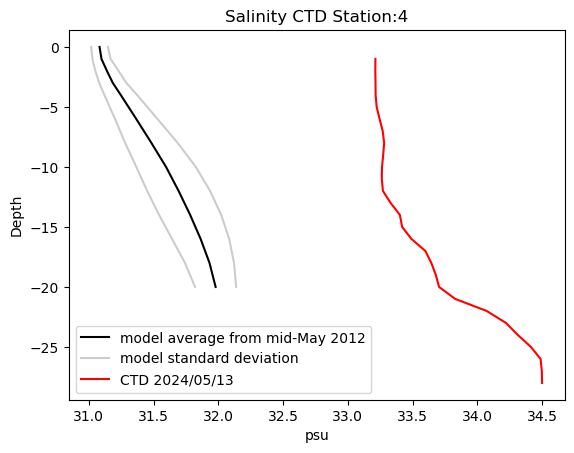

In [53]:
plt.plot(s3.sel(type=0),s3.depth,label='model average from mid-May 2012', color='black')
plt.plot(s3.sel(type=0)+s3.sel(type=1),s3.depth,label='model standard deviation',color='grey',alpha=0.4)
plt.plot(s3.sel(type=0)-s3.sel(type=1),s3.depth,color='grey',alpha=0.4)
plt.plot(obs['Salinity'].isel(HV=2),obs.depth*(-1),label='CTD 2024/05/13', color='red')
plt.title('Salinity CTD Station:'+str(obs.HV[2].values))
plt.ylabel('Depth')
plt.xlabel('psu')
plt.legend()

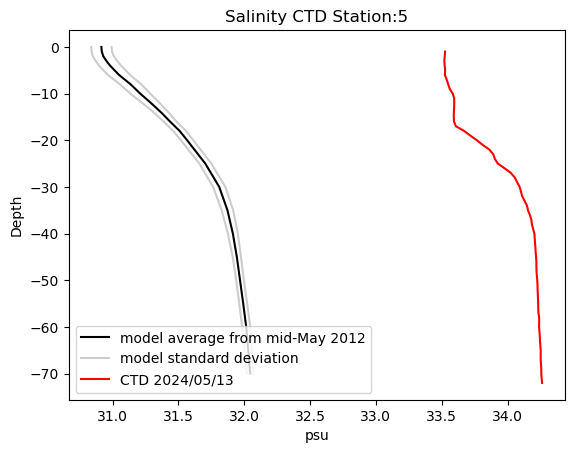

In [54]:
plt.plot(s4.sel(type=0),s4.depth,label='model average from mid-May 2012', color='black')
plt.plot(s4.sel(type=0)+s4.sel(type=1),s4.depth,label='model standard deviation',color='grey',alpha=0.4)
plt.plot(s4.sel(type=0)-s4.sel(type=1),s4.depth,color='grey',alpha=0.4)
plt.plot(obs['Salinity'].isel(HV=3),obs.depth*(-1),label='CTD 2024/05/13', color='red')
plt.title('Salinity CTD Station:'+str(obs.HV[3].values))
plt.ylabel('Depth')
plt.xlabel('psu')
plt.legend()

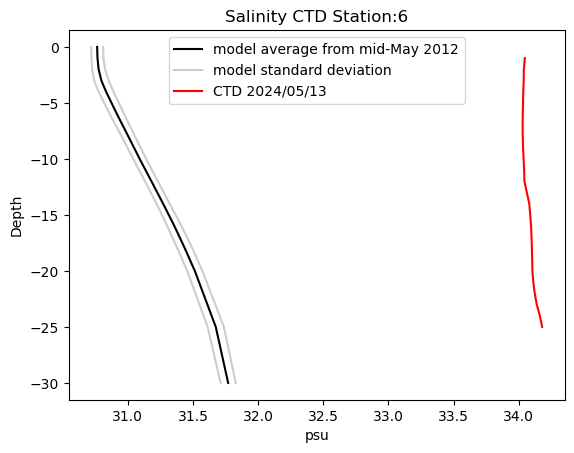

In [55]:
plt.plot(s5.sel(type=0),s5.depth,label='model average from mid-May 2012', color='black')
plt.plot(s5.sel(type=0)+s5.sel(type=1),s5.depth,label='model standard deviation',color='grey',alpha=0.4)
plt.plot(s5.sel(type=0)-s5.sel(type=1),s5.depth,color='grey',alpha=0.4)
plt.plot(obs['Salinity'].isel(HV=4),obs.depth*(-1),label='CTD 2024/05/13', color='red')
plt.title('Salinity CTD Station:'+str(obs.HV[4].values))
plt.ylabel('Depth')
plt.xlabel('psu')
plt.legend()